# Séance 5 : Calcul et représentation de la solution d'une EDO

## Les paquets python de la séance

Les paquets utiles dans cette séance sont sont
* `matplotlib` qui permet de faire tout type de visualisation,
* `math` qui fournit les constantes et fonctions usuelles en maths,
* `numpy` qui permet de représenter les discrétisations sous forme de vecteurs (ou de matrices) et d'effectuer des opérations sur ces variables,
* `scipy` qui regroupe de nombreux algorithmes pour le calcul scientifique.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import exp
from scipy.integrate import odeint, solve_ivp
plt.rcParams['text.usetex'] = True # Pour écrire $U_k$ correctement

## L'équation $u' = - u + t$
### Représentation de la solution

On s'intéresse au problème de Cauchy
\begin{equation*}
\begin{cases}
u'(t) + u(t) = t, \\
u(0) = 0.
\end{cases}
\end{equation*}
On a vu que sa solution est 
\begin{equation*}
u(t) = e^{-t} + t - 1.
\end{equation*}
On trace la solution sur l'intervalle $t\in[0,3]$ avec un pas de temps de $\delta t=0.01$.

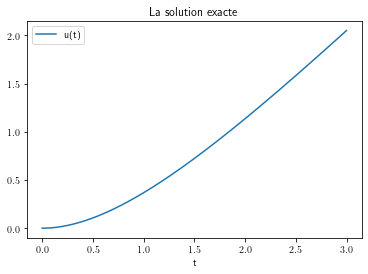

In [2]:
tmin, tmax = 0, 3
deltat = .01
t = np.arange(tmin, tmax + deltat, deltat)
u = np.exp(-t) + t - 1
plt.plot(t, u, label='u(t)')
plt.legend()
plt.xlabel("t")
plt.title("La solution exacte");

### Utilisation de `odeint`

Pour l'utilisation de `odeint`, on définit la fonction $f(t, u) = -u + t$.

In [3]:
def f(t, u):
    return - u + t

On appelle ensuite `odeint` dont les arguments sont : 
* la fonction f
* la donnée initiale
* les temps de calcul

Historiquement `odeint` utilisait l'ordre des variables $f(u,t)$ et non $f(t,u)$ pour la définition de $f$. Pour des raisons de compatibilité avec le reste des développements dans `scipy`, ce n'est plus le standard. Pour utiliser la forme $f(t,u)$, il faut déclarer l'argument optionnel `tfirst=True`.

Lien : [odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html)

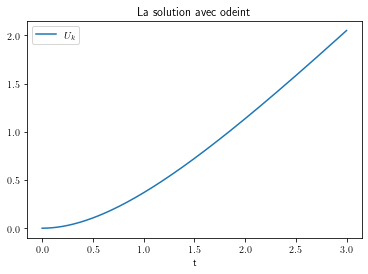

In [4]:
Uk = odeint(f, 0, t, tfirst=True)
plt.plot(t, Uk, label='$U_k$')
plt.legend()
plt.xlabel("t")
plt.title("La solution avec odeint");

On trace maintenant l'erreur entre la solution exacte et la solution calculée. On remarque que `u`et `Uk` ne correspondent pas à la même structure de donnée (vecteur dans un cas, matrice à une colonne dans l'autre), d'où la petite subtilité dans le calcul de la différence ci-dessous.

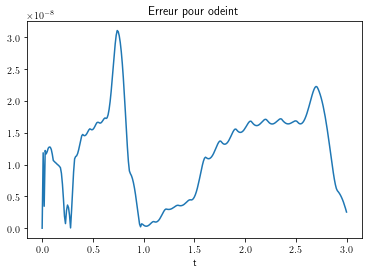

In [5]:
plt.plot(t,np.abs(u-Uk[:,0]))
plt.xlabel("t")
plt.title("Erreur pour odeint");

On oberve une erreur maximale de l'ordre de $10^{-8}$.

## L'équation $u' = 3 u^{2/3}$

Soit $u(t) = t^3$. En dérivant, on obtient $u'(t)=3t^2 = 3(t^3)^{2/3} = 3 u(t)^{2/3}$.
Par ailleurs, on a bien $u(0)=0$. C'est donc bien une solution. 

Calculons une solution numérique avec `odeint` en introduisant la fonction $g(t,u) = 3 u^{2/3}$.

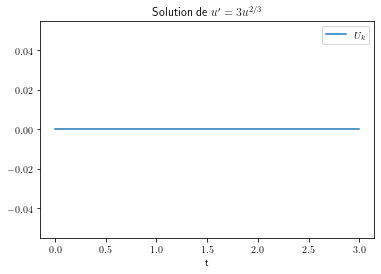

In [6]:
def g(t, u):
    return 3 * u**(2/3)

Gk = odeint(g, 0, t, tfirst=True)
plt.plot(t, Gk, label='$U_k$')
plt.legend()
plt.xlabel("t")
plt.title("Solution de $u' = 3 u^{2/3}$");

La solution obtenue numériquement est la solution nulle. Et c'est d'ailleurs bien une autre solution de l'équation. 
On remarque alors que la fonction $g$ ne vérifie pas la propriété de lipschitziannité exigée par le théorème de Cauchy-Lipschitz. Il est donc possible d'avoir plusieurs solutions. D'ailleurs, pour tout $a\geq0$, la fonction
\begin{equation*}
\begin{cases}
u(t) = 0 & \text{ pour } t\leq a, \\
u(t) = (t-a)^3 \text{ pour } t>a
\end{cases}
\end{equation*}
est également solution. Il y a une infinité de solutions.

## Utilisation de `solve_ivp`

La documentation de `scipy.integrate.odeint` nous signale que les nouveaux développements doivent utiliser une autre fonction : `scipy.integrate.solve_ivp` (IVP pour Initial Value Problem).

Son fonctionnement par défaut est un peu différent, car on donne en entrée 
* la fonction f,
* l'intervalle de calcul,
* la donnée initiale (qui doit être un vecteur même si il est de longueur 1).

Lien : [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp)

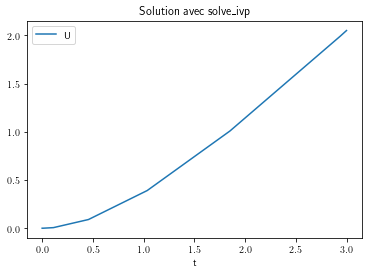

In [7]:
V = solve_ivp(f, [tmin, tmax], [0])
plt.plot(V.t,V.y.T, label="U")
plt.legend()
plt.xlabel("t")
plt.title("Solution avec solve\_ivp");

In [8]:
print(np.shape(V.t))

(10,)


La solution est retournée avec dix temps de calcul, qui ne sont pas espacés régulièrement.

On peut également imposer les temps de calcul. Une première façon de faire cela est de retourner l'objet `sol` que l'on peut évaluer en une liste de temps donnée. Ceci se fait avec l'option `dense_output = True`. On fait alors appel au solveur, puis dans un deuxième temps on peut évaluer la solution.

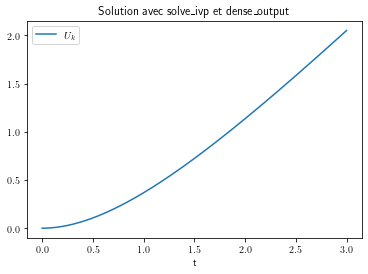

In [9]:
Vdense = solve_ivp(f, [tmin, tmax], [0], dense_output = True)
Vk = Vdense.sol(t).T
plt.plot(t, Vk, label="$U_k$")
plt.legend()
plt.xlabel("t")
plt.title("Solution avec solve\_ivp et dense\_output");

On retrouve une courbe bien régulière.

Une autre façon consiste à imposer les temps d'évaluation avec l'argument `t_eval`.

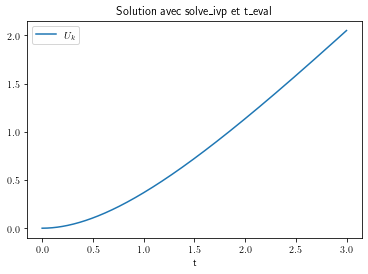

In [10]:
Vt = solve_ivp(f, [tmin, tmax], [0], t_eval=t)
plt.plot(Vt.t, Vt.y.T, label="$U_k$")
plt.legend()
plt.xlabel("t")
plt.title("Solution avec solve\_ivp et t\_eval");

Traçons une nouvelle courbe d'erreur par rapport à la solution exacte.

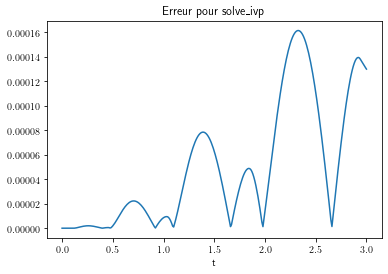

In [11]:
plt.plot(Vt.t, abs(u-Vt.y.T[:,0]))
plt.xlabel("t")
plt.title("Erreur pour solve\_ivp");

On voit que c'est bien moins bon (d'ordre $10^{-4}$) que la solution d'`odeint`, qui était précise à $10^{-8}$ près. 
Par ailleurs l'erreur a une tendance à croître au fil des itérations, alors que cela ne semblait pas être le cas pour `odeint`.

Par ailleurs, et ce TP n'est pas assez intensif pour s'en rendre compte, `odeint` est en fait basé sur une librairie assez robuste en FORTRAN alors que `solve_ivp` est en python pur : `odeint` est donc beaucoup plus rapide (de l'ordre de 20 fois d'après la littérature, mais bien sûr cela dépend du cas test). Gageons que le nouveau standard qu'est `solve_ivp` progresse dans les années à venir. Un de ses avantages est de permettre de choisir explicitement la méthode de calcul utilisée. Pour l'instant, perso, je continue à utiliser `odeint` ou à coder les méthodes moi-même...